In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("bookings.csv") 

In [9]:
data.head(5) # print first 5 entries of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
data.columns # print column names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This dataset contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

There are 32 columns in this dataset:

1. **hotel** -- one of the two hotels
2. **is_canceled** -- Value indicating if the booking was canceled (1) or not (0)
3. **lead_time** -- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. ....

For the full description of each column please see: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [11]:
data['country'] # we can also print each column of the dataset

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [12]:
data['country'].unique() # list all unique values in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [13]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

This dataset contains 119390 different reservations. Some of the reservations have missing values.


In [14]:
data.values # A data frame can be converted into a numpy array by calling the values attribute:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

However this array cannot be directly fed to a scikit-learn model.

1. the values are heterogeneous (strings for categories, integers, and floating point numbers)
2. some attribute values are missing

# Predicting cancellation: Part I -- visualization

We will look at a very natural and practical task -- predicting cancellation of a given reservation. 

As the first visualization task let us understand which monthes have the most amount of cancellations.
We start by creating a new dataset that contains the information that we would like to plot.

In [15]:
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [16]:
n_reserv_H1.head() # again we can have a look at the top 5 entries

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [17]:
n_reserv_H1['April'] # number of reservation for Resort Hotel for April

3609

In [18]:
n_cancel_H1['April'] # number of cancelled reservations for Resort Hotel

1059

In [19]:
# finally, we gather everything together


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# notice how easy it is to add a new column. We simply write the following
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # percent of cancelations

In [20]:
data_visual.head() # our final dataset

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


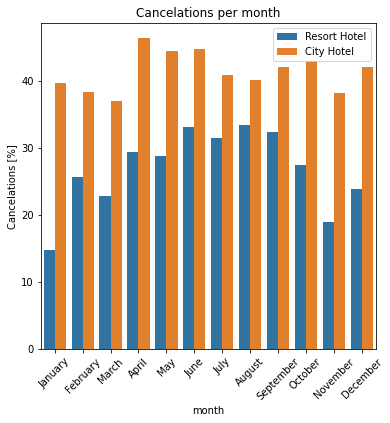

In [21]:
# plotting is simple once we have good dataset.

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
data_visual['month'] = pd.Categorical(data_visual['month'], categories=months, ordered=True)

plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

In the previous graph, we can see that there is a much higher cancellation rate in the City Hotel than in the Resort Hotel. 

In fact, the cancellation rate for the City Hotel is quite consistent around 40% while for the Resort Hotel it is between 15-30%. The 4 months for which there are the most cancellations in the City Hotel are April, May, June and October, generally in spring. For the Resort Hotel, the highest cancellation rates are in the months of June, July, August and September, usually during the summer vacations. The months with the lowest cancellation rates in the City Hotel are January, February, March and November, while for the Resort Hotel January, March, November, December, therefore usually during the winter period.

City Hotel's cancelation rate seems to be quite consistent over the year, always around 40%. The season / month doesn't seem to have a significant impact on it.

However, for the Resort Hotel, the cancelation rate is higher during Spring & Summer (around 30%) than during Autumn and Winter (15-20%).

In [22]:
n_reserv_country_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("country")["hotel"].count()


# same thing we do for the second hotel
n_reserv_country_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("country")["hotel"].count()

In [23]:
n_reserv_country_H1.sort_values(ascending=False)[:2]

country
PRT    17630
GBR     6814
Name: hotel, dtype: int64

In [24]:
n_reserv_country_H2.sort_values(ascending=False)[:2]

country
PRT    30960
FRA     8804
Name: hotel, dtype: int64

As we can see right above, Portugal and the United Kingdom (Great Britain) are the 2 most represented countries for the Resort Hotel.

For the City Hotel, we have Portugal and France.

[]

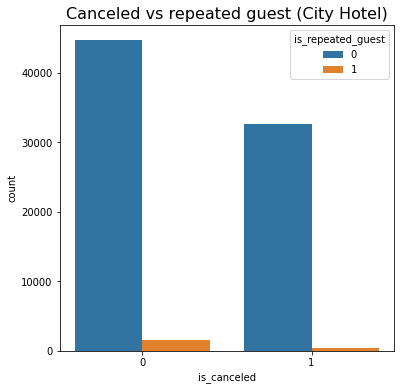

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data[(data['hotel'] == 'City Hotel')])
plt.title("Canceled vs repeated guest (City Hotel)", fontsize=16)
plt.plot()

[]

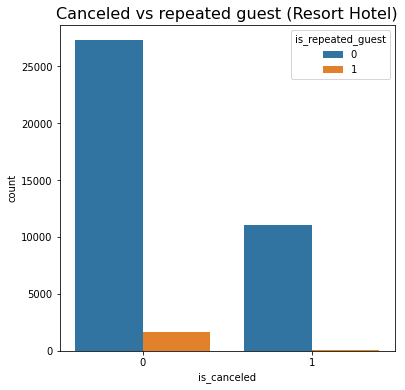

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data[(data['hotel'] == 'Resort Hotel')])
plt.title("Canceled vs repeated guest (Resort Hotel)", fontsize=16)
plt.plot()

[]

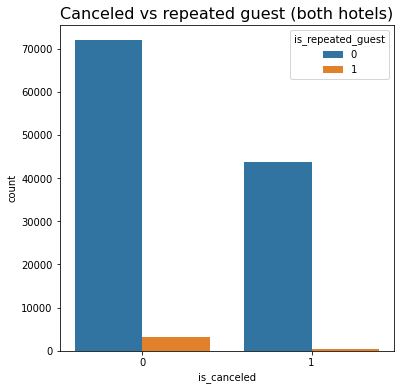

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)
plt.title("Canceled vs repeated guest (both hotels)", fontsize=16)
plt.plot()

Most guests in these two hotels are not repeated, while the repreated guests are less likely to cancel.

Text(0, 0.5, 'Count')

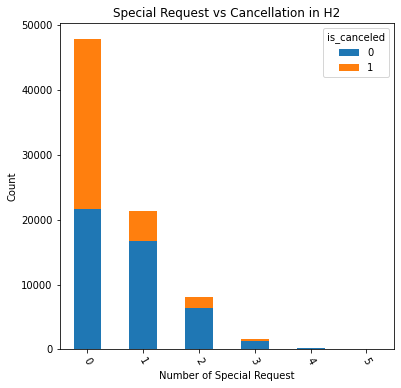

In [28]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Most of the reservations in the city hotel have no special requests and the cancelation in this case is almost 50/50. However, when special requests are made, the cancelation rate is significantly lower.

Text(0, 0.5, 'Count')

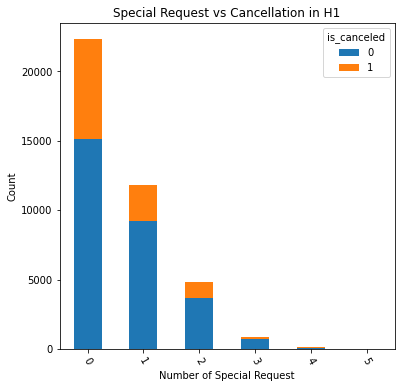

In [29]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H1')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

# Predicting cancellations: Part II -- ML

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [31]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

In [32]:
X.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Before using any ML algorithm we need to handle missing values. We will use the simplest approach. First of all if the feature is numerical and is missing, we are going to replace it with zero. Secondly, if the feature is categorical and is missing, then we are going to define a new category and call it ```Not defined```.

In [33]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. For each categorical feature, the corresponding one-hot encoding contains one column for each possible value, and one row for each row in the original dataset.

In contrast to label encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., for the market_segment feature, "Online TA" is neither more nor less than "Direct" or "Corporate"). This particularity makes one-hot encoding particularly useful in our case.

Now imagine a situation when you want to try a lot of different models and for each model you want to make some cross-validation to select the best hyperparameters. On top of that you want to preprocess the data so that you feed something meaningfull into each method.

The next chunk of code shows how to do it.

In [34]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Results for logreg
{'mean_fit_time': array([6.37257059, 6.23020554, 5.92295011, 6.19928241, 5.12242119]), 'std_fit_time': array([0.14955176, 0.09222378, 0.26285279, 0.21126692, 0.65008333]), 'mean_score_time': array([0.05651983, 0.07680821, 0.07415636, 0.07147741, 0.06014776]), 'std_score_time': array([0.00846581, 0.01748767, 0.01496052, 0.01391624, 0.00091657]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.70125889, 0.70128402, 0.70128402, 0.70058045]), 'split1_test_score': array([0.78237053, 0.78149107, 0.78232028, 0.78174234, 0.78194336]), 'split2_test_score': array([0.73547593, 0.736079  , 0.73570208, 0.73733541, 0.7368831 ]), 'mean_test_score': array([0.73971016, 0.73960965, 0.73976879, 0.74012059, 0.73980

c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [36]:
numeric_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                    ("scaler", StandardScaler())]) 

categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 


preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])    

In [37]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([1.53622278, 1.90406593, 1.93331258, 2.24185483, 1.85077437]), 'std_fit_time': array([0.23051367, 0.60235171, 0.42996103, 0.93848586, 0.08244995]), 'mean_score_time': array([0.06798808, 0.06494029, 0.06130735, 0.06715202, 0.06578151]), 'std_score_time': array([0.00651551, 0.00386253, 0.00783904, 0.00461329, 0.00284985]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.70005277, 0.68552906, 0.67572933, 0.66600498]), 'split1_test_score': array([0.78259668, 0.78244591, 0.78229515, 0.78221977, 0.78219464]), 'split2_test_score': array([0.73585285, 0.73582772, 0.73582772, 0.736079  , 0.73633028]), 'mean_test_score': array([0.73991118, 0.73944213, 0.73455064, 0.7313427 , 0.72817

In [38]:
models = [("rf", RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1))]
grids = {"rf" : {'rf__n_estimators': np.arange(60,120+1,30),
                 'rf__max_depth': np.arange(7,13)
                }
        }
           
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for rf
{'mean_fit_time': array([2.42665219, 3.41705902, 4.51230661, 2.43898177, 3.63561098,
       4.89030091, 2.62778203, 3.72261691, 5.08424616, 3.01012802,
       4.21796711, 5.22949998, 2.92022928, 4.3980515 , 5.93911513,
       3.33896613, 5.02329397, 6.27519854]), 'std_fit_time': array([0.06045323, 0.07673096, 0.10830521, 0.01945896, 0.17422264,
       0.0423628 , 0.12006823, 0.16416883, 0.31178964, 0.12560196,
       0.11116542, 0.12475533, 0.15532636, 0.22946482, 0.18387763,
       0.1223355 , 0.47014365, 0.28580017]), 'mean_score_time': array([0.29958344, 0.44112206, 0.54900511, 0.29646564, 0.43492587,
       0.58953118, 0.34302457, 0.45064871, 0.63386798, 0.3773632 ,
       0.50624847, 0.65206663, 0.3642811 , 0.47458092, 0.62537726,
       0.36774643, 0.5479397 , 0.69715412]), 'std_score_time': array([0.0289486 , 0.06235476, 0.0522047 , 0.0367422 , 0.0115598 ,
       0.05429247, 0.02696604, 0.0552708 , 0.04696347, 0.04694297,
       0.06608857, 0.09803176, 0.06191935,

In [39]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, mean_squared_error, plot_roc_curve, make_scorer, roc_curve

## I. Data exploration

**hotel:** Hotel (H1 = Resort Hotel or H2 = City Hotel)

**is_canceled:** Value indicating if the booking was canceled (1) or not (0)

**lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year:** Year of arrival date

**arrival_date_month:** Month of arrival date

**arrival_date_week_number:** Week number of year for arrival date

**arrival_date_day_of_month:** Day of arrival date

**stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults:** Number of adults

**children:** Number of children

**babies:** Number of babies

**meal:** Type of meal booked. Categories are presented in standard hospitality meal packages:
- Undefined/SC = no meal package
- BB = Bed & Breakfast
- HB = Half board (breakfast and one other meal – usually dinner)
- FB = Full board (breakfast, lunch and dinner)

**country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format

**market_segment:** Market segment designation.
- The term “TA” means “Travel Agents”
- The term “TO” means “Tour Operators”

**distribution_channel:** Booking distribution channel.
- The term “TA” means “Travel Agents”
- The term “TO” means “Tour Operators”

**is_repeated_guest:** Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations:** Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes:** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
- No Deposit = no deposit was made
- Non Refund = a deposit was made in the value of the total stay cost
- Refundable = a deposit was made with a value under the total cost of stay

**agent:** ID of the travel agency that made the booking

**company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type:** Type of booking, assuming one of four categories:
- Contract = when the booking has an allotment or other type of contract associated to it
- Group = when the booking is associated to a group
- Transient = when the booking is not part of a group or contract, and is not associated to other transient booking
- Transient-party = when the booking is transient, but is associated to at least other transient booking

**adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces:** Number of car parking spaces required by the customer

**total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status:** Reservation last status, assuming one of three categories:
- Canceled = booking was canceled by the customer
- Check-Out = customer has checked in but already departed
- No-Show = customer did not check-in and did inform the hotel of the reason why

**reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the *reservation_status* to understand when was the booking canceled or when did the customer checked-out of the hotel

### 1.1) Descriptive statistics

In [40]:
data = pd.read_csv(str("bookings.csv"))
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [41]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(119390, 32)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_

In [42]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


In [43]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [44]:
print(data["required_car_parking_spaces"].unique())
data["homework_target"] = np.where(data.required_car_parking_spaces == 0,0,1)
print(data["homework_target"].unique()) 

[0 1 2 8 3]
[0 1]


In [45]:
assert data.loc[data.required_car_parking_spaces == 0, "homework_target"].unique().item() == 0
assert data.loc[data.required_car_parking_spaces == 0].shape[0] == data.loc[data.homework_target == 0].shape[0]

assert data.loc[data.required_car_parking_spaces != 0, "homework_target"].unique().item() == 1 
assert data.loc[data.required_car_parking_spaces != 0].shape[0] == data.loc[data.homework_target == 1].shape[0]

In [46]:
data["arrival_date"] = data['arrival_date_day_of_month'].astype(str) + data['arrival_date_month'].astype(str) + data['arrival_date_year'].astype(str)
data["arrival_date"] = pd.to_datetime(data["arrival_date"], format='%d%B%Y')
data["reserved_assigned_room_type"] = np.where(data["reserved_room_type"] == data["assigned_room_type"], 1, 0)

In [47]:
Col_to_drop = ["is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_week_number",
               "arrival_date_day_of_month", "reserved_room_type", "assigned_room_type",
               "required_car_parking_spaces", "reservation_status", "reservation_status_date",
               "country", "agent", "company"]
data = data.drop(Col_to_drop, axis=1)
data.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,homework_target,arrival_date,reserved_assigned_room_type
0,Resort Hotel,0,0,2,0.0,0,BB,Direct,Direct,0,...,0,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,1
1,Resort Hotel,0,0,2,0.0,0,BB,Direct,Direct,0,...,0,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,1
2,Resort Hotel,0,1,1,0.0,0,BB,Direct,Direct,0,...,0,0,No Deposit,0,Transient,75.0,0,0,2015-07-01,0
3,Resort Hotel,0,1,1,0.0,0,BB,Corporate,Corporate,0,...,0,0,No Deposit,0,Transient,75.0,0,0,2015-07-01,1
4,Resort Hotel,0,2,2,0.0,0,BB,Online TA,TA/TO,0,...,0,0,No Deposit,0,Transient,98.0,1,0,2015-07-01,1


In [48]:
print(data.columns)
data.isnull().sum()

Index(['hotel', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'homework_target', 'arrival_date',
       'reserved_assigned_room_type'],
      dtype='object')


hotel                             0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
homework_target                   0
arrival_date                      0
reserved_assigned_room_type       0
dtype: int64

In [49]:
num_var = ["stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",
           "previous_cancellations", "previous_bookings_not_canceled", "booking_changes",
           "days_in_waiting_list", "adr","total_of_special_requests"]

cat_var = ["hotel", "meal", "market_segment", "distribution_channel", "is_repeated_guest",
           "deposit_type", "customer_type", "reserved_assigned_room_type"]

target = ["homework_target"]

date_var = ["arrival_date"]

assert len(num_var) + len(cat_var) + len(target) + len(date_var) == len(data.columns)

In [50]:
for col in cat_var:
    data[col] = data[col].astype('category')
data["homework_target"] = data["homework_target"].astype('category')
data.dtypes

hotel                                   category
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                    category
market_segment                          category
distribution_channel                    category
is_repeated_guest                       category
previous_cancellations                     int64
previous_bookings_not_canceled             int64
booking_changes                            int64
deposit_type                            category
days_in_waiting_list                       int64
customer_type                           category
adr                                      float64
total_of_special_requests                  int64
homework_target                         category
arrival_date                      datetime64[ns]
reserved_assigned_ro

### 1.2) Univariate analysis

#### 1.2.1) Analysis of the target variable distribution

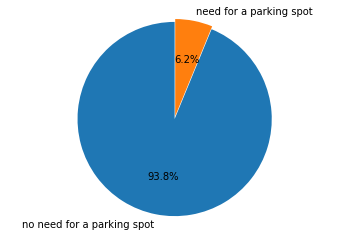

In [51]:
labels = 'no need for a parking spot', 'need for a parking spot'
y0 = data.loc[data.homework_target == 0].shape[0]
y1 = data.loc[data.homework_target == 1].shape[0]
sizes = [y0, y1]
explode = (0, 0.03)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

#### 1.2.2) Analysis of the numerical variables distribution

c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\lilia\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


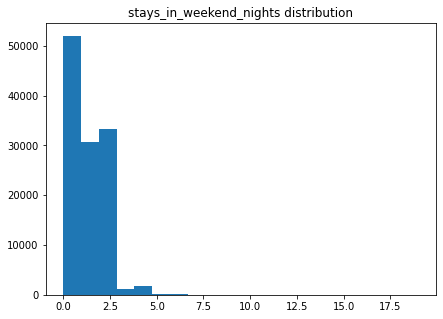

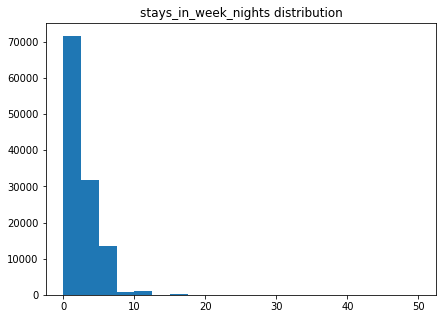

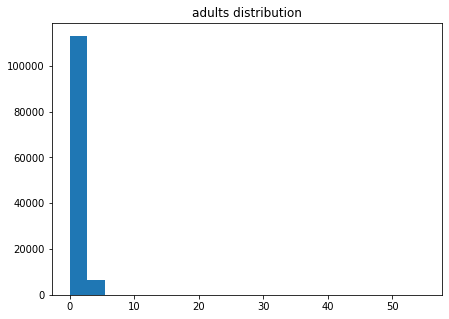

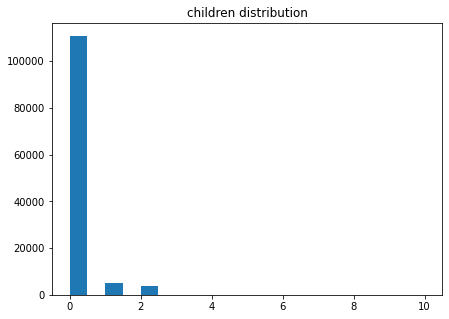

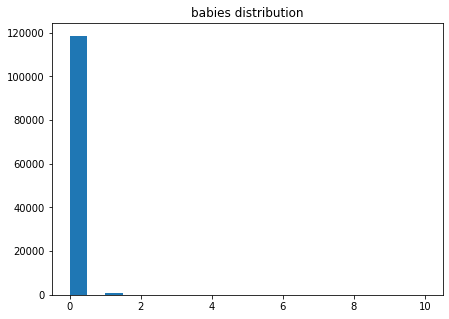

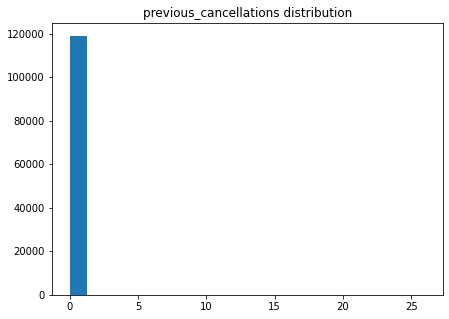

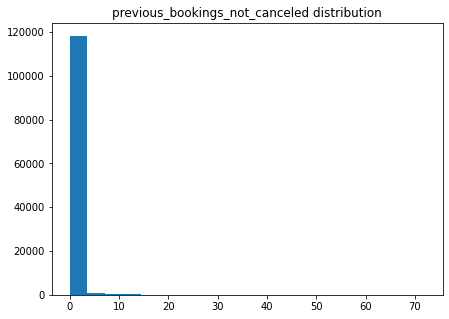

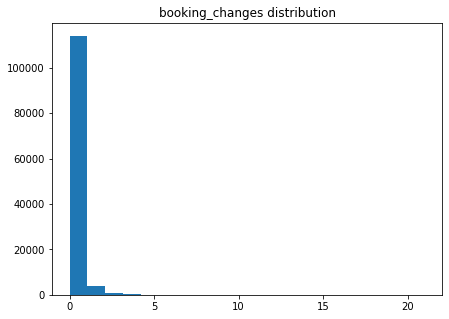

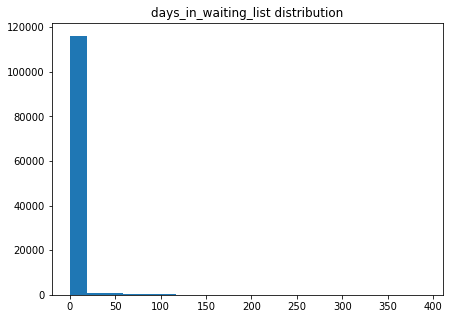

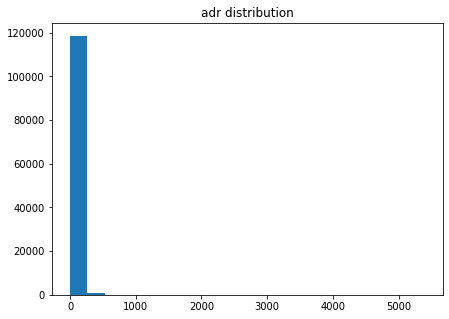

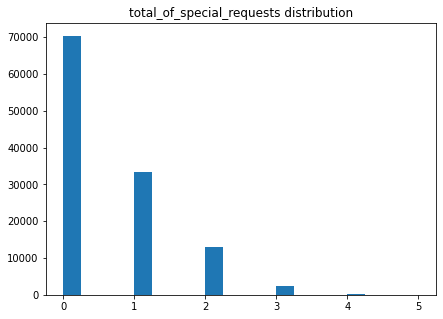

In [52]:
for feature in num_var:
    f = plt.figure(figsize=(7,5))
    ax = f.add_subplot()
    ax.hist(data[feature], bins = 20)
    plt.title(feature + ' distribution')

#### 1.2.3) Analysis of the categorical variables distribution

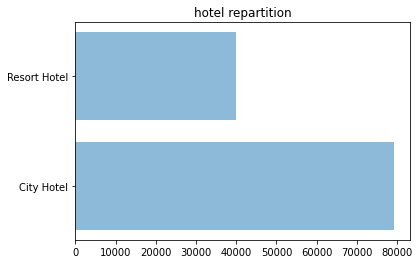

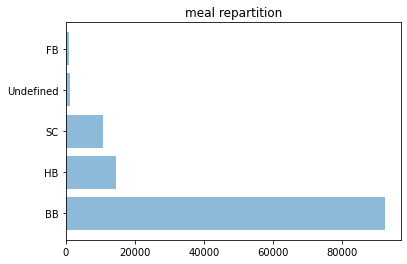

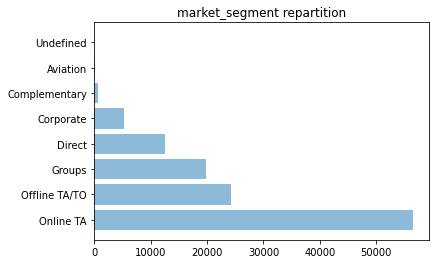

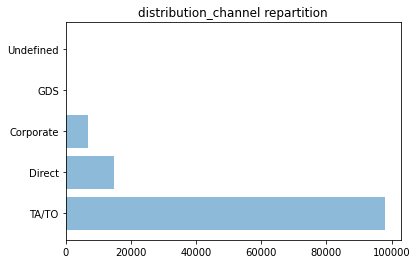

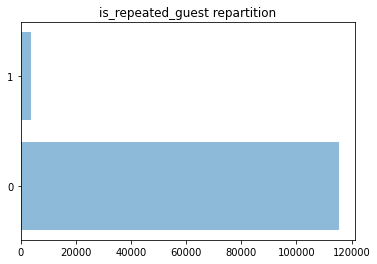

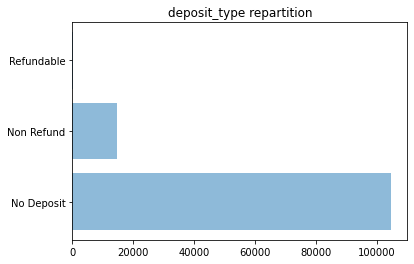

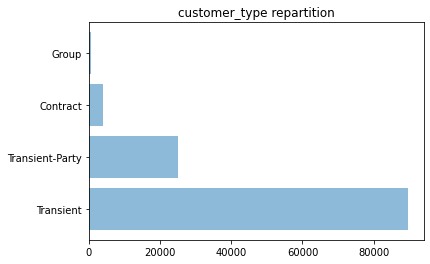

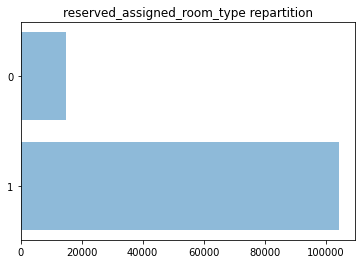

In [53]:
for feature in cat_var:
    dfTemp = pd.DataFrame(data[feature].value_counts()).reset_index()
    y_pos = np.arange(len(dfTemp['index']))
    plt.barh(y_pos, dfTemp[feature], align='center', alpha=0.5)
    plt.yticks(y_pos, dfTemp['index'])
    plt.title(feature + ' repartition')
    plt.show()

### 1.3) Bivariate analysis

#### 1.3.1) Correlation between our numerical features

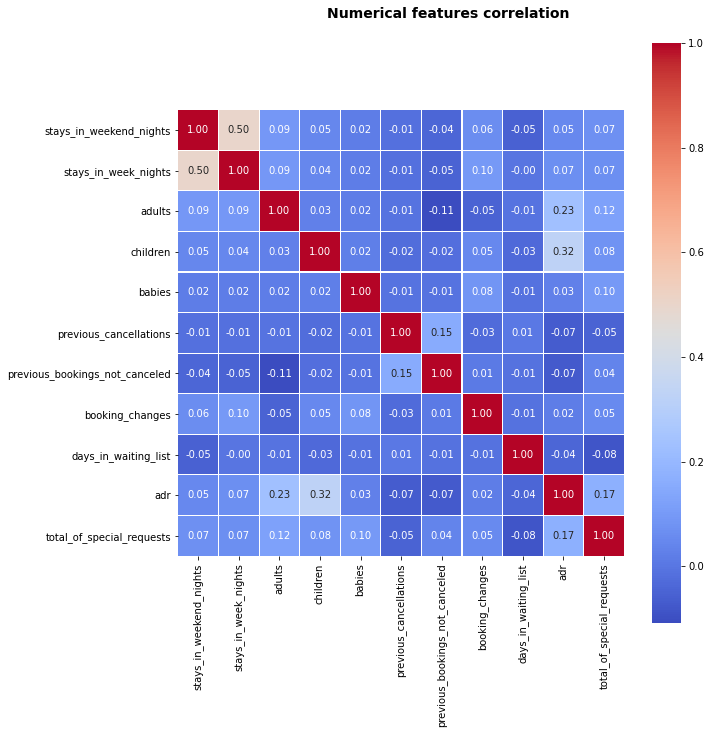

In [54]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,10))

corr = data[num_var].corr()

hm = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm", 
                 square=True,    
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Numerical features correlation',fontsize=14, fontweight='bold')
plt.show()


#### 1.3.2) Correlation between our features and the target variable

In [55]:
#tableau de contigence

for X in cat_var:
    Y = "homework_target"
    cont = pd.pivot_table(data[[X, Y]], index=X, columns=Y, aggfunc=len).fillna(0)
    chi2, pvalue, degrees, expected = chi2_contingency(cont)
    print("Chi2 test " + X)
    print(chi2)
    print(format(pvalue, '.4f'))
    print(degrees)
    print()

Chi2 test hotel
5808.204237664535
0.0000
1

Chi2 test meal
332.49129240518533
0.0000
4

Chi2 test market_segment
4087.2703475473595
0.0000
7

Chi2 test distribution_channel
2757.928623199727
0.0000
4

Chi2 test is_repeated_guest
674.9817769460532
0.0000
1

Chi2 test deposit_type
1102.6661309389924
0.0000
2

Chi2 test customer_type
590.1291515319318
0.0000
3

Chi2 test reserved_assigned_room_type
785.5967353859515
0.0000
1



#### 1.3.3) Analysis of the target variable through time

In [56]:
DataDate = data[['arrival_date','homework_target']].groupby(['arrival_date','homework_target']).size().reset_index(name='counts')
DataDate = DataDate.loc[DataDate.homework_target == 1]
print(DataDate.shape)
print(DataDate.isnull().sum())
DataDate.head()

(793, 3)
arrival_date       0
homework_target    0
counts             0
dtype: int64


,arrival_date,homework_target,counts
1,2015-07-01,1,4
3,2015-07-02,1,5
5,2015-07-03,1,7
7,2015-07-04,1,7
9,2015-07-05,1,12


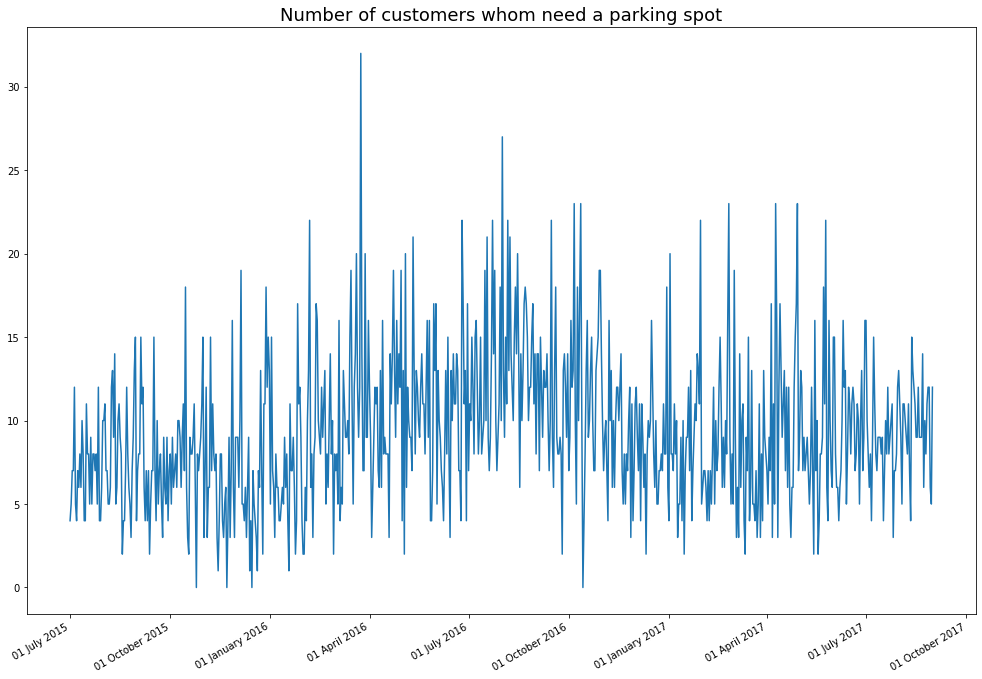

In [57]:
fig, ax = plt.subplots(1, figsize=(17,12))
fig.autofmt_xdate()
plt.plot(DataDate.arrival_date, DataDate.counts)
xfmt = mdates.DateFormatter("%d %B %Y")
ax.xaxis.set_major_formatter(xfmt)
plt.title('Number of customers whom need a parking spot', fontsize=18)
plt.show()

## II. Balancing the training set

In [58]:
X = data.drop("homework_target", axis=1)
y = data["homework_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
train = pd.concat([X_train, y_train], axis=1)
train1 = train.loc[train.homework_target == 1].reset_index(drop=True)
train0 = train.loc[train.homework_target == 0].reset_index(drop=True)

In [60]:
print(train1.shape[0])
print(train0.shape[0])
N = train1.shape[0]

5580
83962


In [61]:
UnderSampling = train0.sample(n = N, random_state=13)
BalanceData = pd.concat([train1, UnderSampling], axis=0)
X_train = BalanceData.drop("homework_target", axis=1)
y_train = BalanceData["homework_target"]

In [62]:
assert  BalanceData.loc[BalanceData.homework_target == 0].shape[0] ==\
        BalanceData.loc[BalanceData.homework_target == 1].shape[0] ==\
        sum(y_train) == N == X_train.shape[0]/2

## III. Predicting SMS notification sent to customers whom need a parking spot

In [63]:
numeric_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value=0)),("scaler", MaxAbsScaler())])
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="NA")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))])
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, num_var),
                                          ("cat", categorical_transformer, cat_var)])


In [64]:
### LONG TO RUN ###

models = [('knn', KNeighborsClassifier()),
        ("logreg", LogisticRegression(max_iter=10000, random_state=1)),
         ("RF", RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)),
         ("svc", LinearSVC(max_iter=5000))]

grids = {"knn" : {'knn__n_neighbors': [1, 2, 3, 4, 5]},
        "logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)
                    }, 
         "RF" : {'RF__n_estimators' : np.arange(60,120+1,30),
                 'RF__max_depth': np.arange(7, 13)
                },
         "svc" : {'svc__C': np.logspace(-2, 2, 5, base=2)}
        }

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X_train, y_train)
    print('Returned hyperparameter: {}'.format(clf.best_params_))
    print('Best classification accuracy in train is: {}'.format(clf.best_score_))
    print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))
    print()
    

Returned hyperparameter: {'knn__n_neighbors': 5}
Best classification accuracy in train is: 0.7379928315412186
Classification accuracy on test is: 0.7168654516215491

Returned hyperparameter: {'logreg__C': 2.0}
Best classification accuracy in train is: 0.7569892473118279
Classification accuracy on test is: 0.7515411417850443

Returned hyperparameter: {'RF__max_depth': 12, 'RF__n_estimators': 90}
Best classification accuracy in train is: 0.7759856630824373
Classification accuracy on test is: 0.7529817743232378

Returned hyperparameter: {'svc__C': 0.25}
Best classification accuracy in train is: 0.757347670250896
Classification accuracy on test is: 0.7525462342535513



### 3.1) KNN

In [65]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1 - conf_accuracy
    
    # calculate the sensitivity (recall)
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*30)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity (Recall): {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

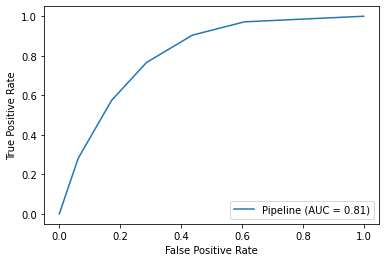

In [66]:
best_KNN = KNeighborsClassifier(n_neighbors=5)
pipe = Pipeline(steps=[('preprocessor', preproc), ('KNN', best_KNN)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.739726819536103


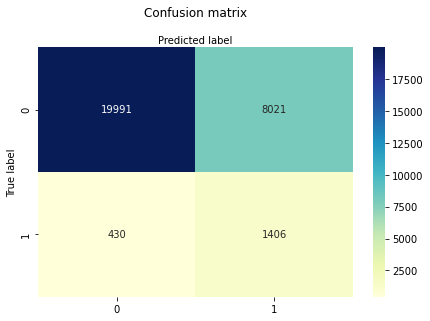

In [67]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
confusion_metrics(cnf_matrix)

True Positives: 1406
True Negatives: 19991
False Positives: 8021
False Negatives: 430
------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity (Recall): 0.77
Specificity: 0.71
Precision: 0.15
f_1 Score: 0.25


### 3.2) Logistic regression

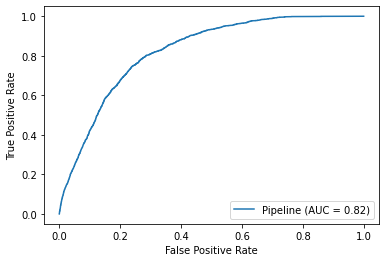

In [69]:
best_logreg = LogisticRegression(max_iter=10000, C=4.0, random_state=1)
pipe = Pipeline(steps=[('preprocessor', preproc), ('LogisticRegression', best_logreg)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
ROC = plot_roc_curve(pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.7530578631566863


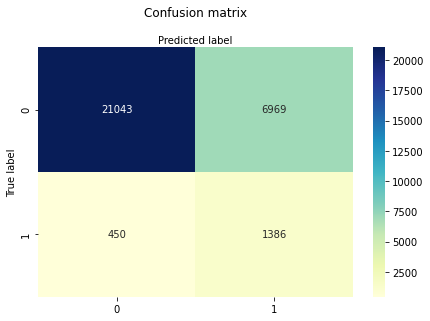

In [70]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
confusion_metrics(cnf_matrix)

True Positives: 1386
True Negatives: 21043
False Positives: 6969
False Negatives: 450
------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity (Recall): 0.75
Specificity: 0.75
Precision: 0.17
f_1 Score: 0.27


### 3.3) SVM

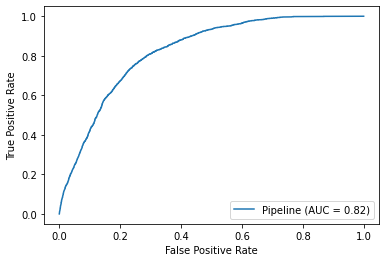

In [72]:
best_SVC = LinearSVC(max_iter=5000,C=0.25)
pipe = Pipeline(steps=[('preprocessor', preproc), ('SVC', best_SVC)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.7533924147665317


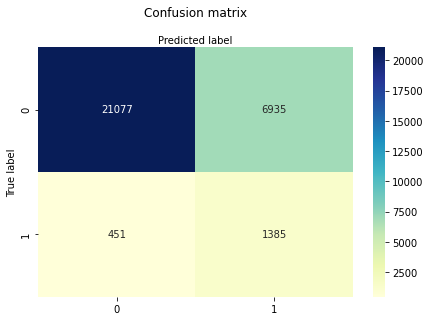

In [73]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
confusion_metrics(cnf_matrix)

True Positives: 1385
True Negatives: 21077
False Positives: 6935
False Negatives: 451
------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity (Recall): 0.75
Specificity: 0.75
Precision: 0.17
f_1 Score: 0.27


### 3.4) Random forest model

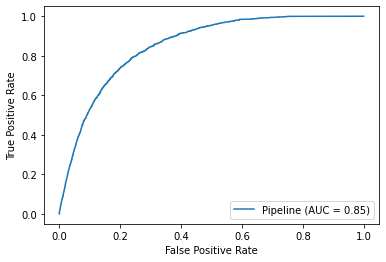

In [75]:
best_RF = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=1)
pipe = Pipeline(steps=[('preprocessor', preproc), ('RandomForest', best_RF)])
best_pipe = pipe.fit(X_train, y_train)
ROC = plot_roc_curve(best_pipe, X_test, y_test)
plt.show()

Balanced Accuracy: 0.7739829911052748


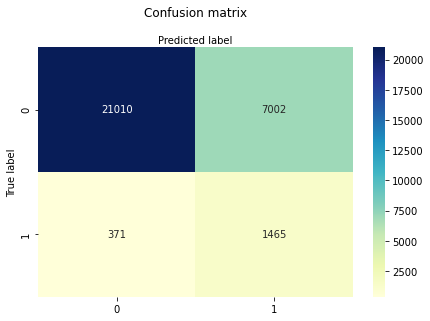

In [76]:
print("Balanced Accuracy:",balanced_accuracy_score(y_test,best_pipe.predict(X_test)))
cnf_matrix = confusion_matrix(y_test, best_pipe.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') # create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [77]:
confusion_metrics(cnf_matrix)

True Positives: 1465
True Negatives: 21010
False Positives: 7002
False Negatives: 371
------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity (Recall): 0.8
Specificity: 0.75
Precision: 0.17
f_1 Score: 0.28


### 3.3) Features Importance

In [78]:
num_check = []
cat_check = []
all_type_var = []

for col in X_train.columns.tolist():
    if is_numeric_dtype(X_train[col]) == True:
        num_check.append(col)
        all_type_var.append(col)
    elif is_categorical_dtype(X_train[col]) == True:
        cat_feature_names = pd.get_dummies(X_train[col]).columns.tolist()
        new_cat_feature_names = [col + "_" + str(x) for x in cat_feature_names]
        cat_check.extend(new_cat_feature_names)
        all_type_var.extend(new_cat_feature_names)


In [79]:
X_train_preproc = pd.DataFrame(preproc.fit_transform(X_train))
assert len(num_check) + len(cat_check) == len(X_train_preproc.columns.tolist())
dict(list(enumerate(all_type_var)))

{0: 'hotel_City Hotel',
 1: 'hotel_Resort Hotel',
 2: 'stays_in_weekend_nights',
 3: 'stays_in_week_nights',
 4: 'adults',
 5: 'children',
 6: 'babies',
 7: 'meal_BB',
 8: 'meal_FB',
 9: 'meal_HB',
 10: 'meal_SC',
 11: 'meal_Undefined',
 12: 'market_segment_Aviation',
 13: 'market_segment_Complementary',
 14: 'market_segment_Corporate',
 15: 'market_segment_Direct',
 16: 'market_segment_Groups',
 17: 'market_segment_Offline TA/TO',
 18: 'market_segment_Online TA',
 19: 'market_segment_Undefined',
 20: 'distribution_channel_Corporate',
 21: 'distribution_channel_Direct',
 22: 'distribution_channel_GDS',
 23: 'distribution_channel_TA/TO',
 24: 'distribution_channel_Undefined',
 25: 'is_repeated_guest_0',
 26: 'is_repeated_guest_1',
 27: 'previous_cancellations',
 28: 'previous_bookings_not_canceled',
 29: 'booking_changes',
 30: 'deposit_type_No Deposit',
 31: 'deposit_type_Non Refund',
 32: 'deposit_type_Refundable',
 33: 'days_in_waiting_list',
 34: 'customer_type_Contract',
 35: 'cust

In [80]:
importances = pipe.named_steps["RandomForest"].feature_importances_
data = {'Variables':all_type_var, 'Importances':importances} 
feature_importances = pd.DataFrame(data).sort_values(by ='Importances', ascending=False)
feature_importances.head()

,Variables,Importances
11,meal_Undefined,0.167928
12,market_segment_Aviation,0.152823
9,meal_HB,0.116076
1,hotel_Resort Hotel,0.044650
33,days_in_waiting_list,0.043736


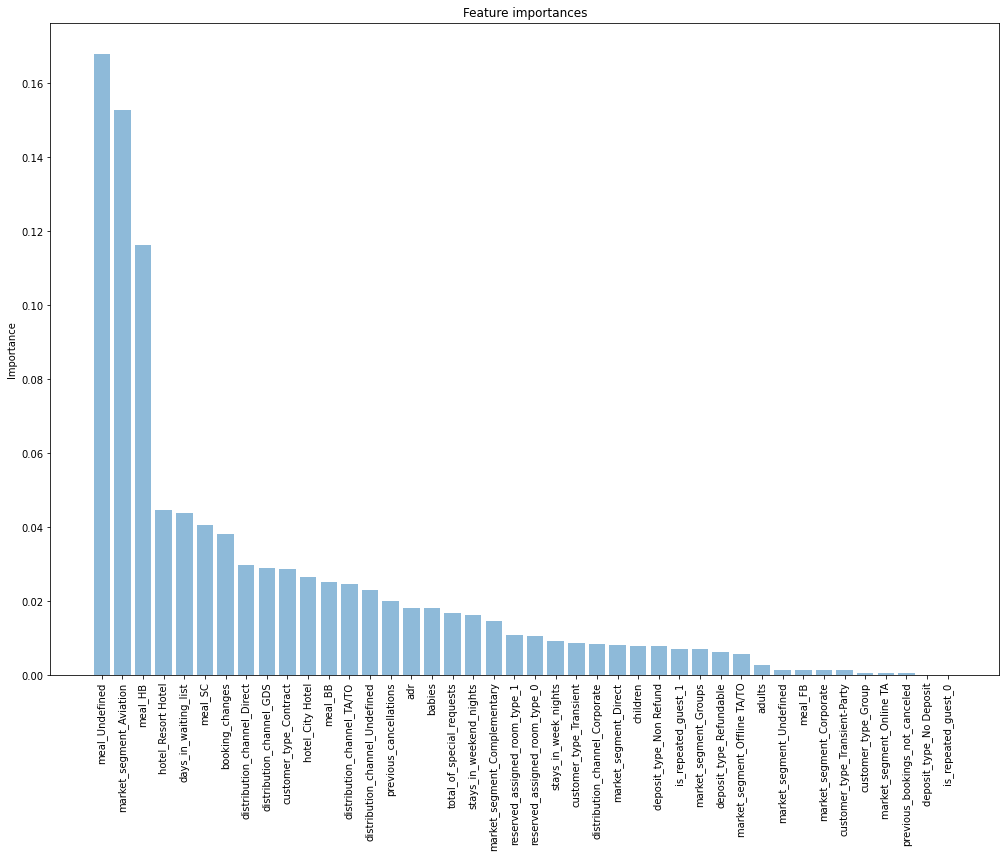

In [81]:
f = plt.figure(figsize=(17,12))
y_pos = np.arange(len(feature_importances['Variables']))
plt.bar(y_pos, feature_importances['Importances'], align='center', alpha=0.5)
plt.xticks(y_pos, feature_importances['Variables'], rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()